In [1]:
% matplotlib inline

import h5py as hp
import numpy as np
import pandas as pd
from math import *
import matplotlib.pyplot as plt
import scipy.io as sio
import seawater as sw

In [2]:
# import the ostreo data 
cfname = '/Volumes/sclayton/kuroshio/genomics/ostreo.mat'
f = hp.File(cfname)

lon = np.array(f['lon'])
T = np.array(f['T'])
z = np.array(f['z'])

kuro = np.where(np.logical_and((np.logical_or(np.logical_and(lon > 140,T>18.1),T<16)), z==0))
kuro= kuro[1]

OI = np.array(f['O'])[0,kuro]
OII = np.array(f['O'])[1,kuro]
lat = np.array(f['lat'])[0,kuro]

OIerr = np.array([1.1,975.2,5,0,0,0,0,0,232.8,343,454.9,30.8,0.5,0,58.2,47.8,87.5,105.4,166.9,36.3,0,0,0,0,0,0])
OIIerr = np.array([3409.4,808.6,1180.8,282.9,517,48.5,59.6,36.5,76.2,33.2,99.6,971.4,833.8,377.2,130.5,100.2,21.1,118.6,373.7,487.9,231.4,335.7,123.2,77.8,47.5,37.3])


In [3]:
# load in the bottle data
coords = np.loadtxt('/Volumes/sclayton/kuroshio/cruise_data/CTDbottles.dat', delimiter='\t')

Ab = np.where(coords[:,1]==1)
Bb = np.where(coords[:,1]==2)
Db = np.where(coords[:,1]==4)
Eb = np.where(coords[:,1]==5)

botlat = coords[:,2] + coords[:,3]/60


In [4]:
lon = lon[0,kuro]
A = np.where(lon==143.5)
B = np.where(lon==144)
D = np.where(lon==145)
E = np.where(lon==145.5)


In [28]:
# import the transect data
TA = np.loadtxt('/Volumes/sclayton/kuroshio/from_ODV/temp_A.dat',delimiter=',')
TB = np.loadtxt('/Volumes/sclayton/kuroshio/from_ODV/temp_B.dat',delimiter=',')
TD = np.loadtxt('/Volumes/sclayton/kuroshio/from_ODV/temp_D.dat',delimiter=',')
TE = np.loadtxt('/Volumes/sclayton/kuroshio/from_ODV/temp_E.dat',delimiter=',')

NA = np.loadtxt('/Volumes/sclayton/kuroshio/from_ODV/no3_A.dat',delimiter=',')
NB = np.loadtxt('/Volumes/sclayton/kuroshio/from_ODV/no3_B.dat',delimiter=',')
ND = np.loadtxt('/Volumes/sclayton/kuroshio/from_ODV/no3_D.dat',delimiter=',')
NE = np.loadtxt('/Volumes/sclayton/kuroshio/from_ODV/no3_E.dat',delimiter=',')

DA = np.loadtxt('/Volumes/sclayton/kuroshio/from_ODV/sigt_A.dat',delimiter=',')
DB = np.loadtxt('/Volumes/sclayton/kuroshio/from_ODV/sigt_B.dat',delimiter=',')
DD = np.loadtxt('/Volumes/sclayton/kuroshio/from_ODV/sigt_D.dat',delimiter=',')
DE = np.loadtxt('/Volumes/sclayton/kuroshio/from_ODV/sigt_E.dat',delimiter=',')

SA = np.loadtxt('/Volumes/sclayton/kuroshio/from_ODV/sal_A.dat',delimiter=',')
SB = np.loadtxt('/Volumes/sclayton/kuroshio/from_ODV/sal_B.dat',delimiter=',')
SD = np.loadtxt('/Volumes/sclayton/kuroshio/from_ODV/salt_D.dat',delimiter=',')
SE = np.loadtxt('/Volumes/sclayton/kuroshio/from_ODV/salt_E.dat',delimiter=',')


In [42]:
SSB = np.reshape(SB[:,2],(190,486))[:,25:486]
SZB = np.reshape(SB[:,1],(190,486))[:,25:486]
SLB = np.reshape(SB[:,0],(190,486))[:,25:486]

NSB = np.reshape(NB[:,2],(190,486))[:,25:486]
NZB = np.reshape(NB[:,1],(190,486))[:,25:486]
NLB = np.reshape(NB[:,0],(190,486))[:,25:486]



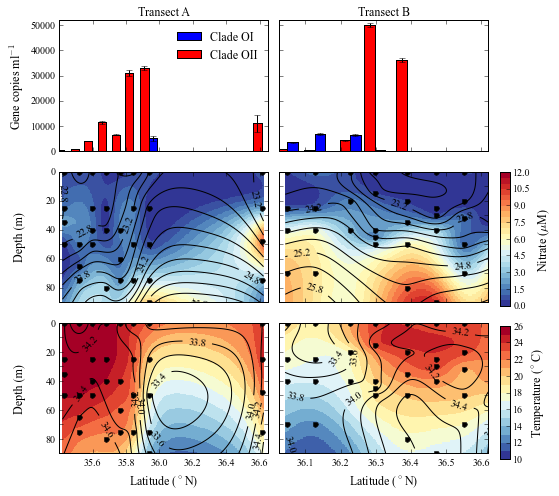

In [43]:
## make a figure S2

from mpl_toolkits.axes_grid.inset_locator import inset_axes
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})
rcParams.update({'font.family': 'serif'})
rcParams.update({'font.serif': 'Times New Roman'})

palette_temp = plt.get_cmap('RdYlBu_r',16)
palette_nit = plt.get_cmap('RdYlBu_r',24)

den_lev = [22.5, 22.75, 23., 23.25, 23.5, 23.75, 24., 24.25, 24.5, 24.75, 25., 25.25, 25.5, 25.75, 26.]
sal_lev = [33.2, 33.4, 33.6, 33.8, 34., 34.2, 34.4, 34.6]


width = 0.05
figS2 , ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3,2, sharex = 'col', figsize=(7,7), dpi = 600)
ax3.invert_yaxis()
ax4.invert_yaxis()
ax5.invert_yaxis()
ax6.invert_yaxis()

# column 1, transect A
ax1.bar(lat[A],OI[A], width, yerr = OIerr[A],color='b',error_kw=dict(ecolor='k'), label='Clade OI')
ax1.bar(lat[A]-width,OII[A], width, yerr = OIIerr[A], color='r',error_kw=dict(ecolor='k'), label='Clade OII')
ax1.set_xlim([35.4, 36.65])
ax1.set_ylim([0, 52000])
ax1.set_ylabel(r'Gene copies ml$^{-1}$', fontsize = 12)
ax1.set_title('Transect A', fontsize=12)

nit = ax3.pcolor(np.reshape(NA[:,0],(190,486)), np.reshape(NA[:,1],(190,486)), np.reshape(NA[:,2],(190,486)), vmin = 0, vmax =12, cmap = palette_nit)
den1 = ax3.contour(np.reshape(DA[:,0],(190,486)), np.reshape(DA[:,1],(190,486)), np.reshape(DA[:,2],(190,486)),den_lev,colors='k')
ax3.clabel(den1, den_lev[1::2], inline=1, fontsize=10, fmt='%3.1f')
ax3.set_ylabel('Depth (m)', fontsize = 12, labelpad = 20)
ax3.set_ylim([90, 0])
ax3.set_yticks([90, 80, 70, 60, 50, 40, 30, 20, 10, 0])
ax3.set_yticklabels(['','80','','60','','40','','20','','0'])
ax3.plot(botlat[Ab], coords[Ab,4].transpose(),'.k',markersize=10)


temp = ax5.pcolor(np.reshape(TA[:,0],(190,486)), np.reshape(TA[:,1],(190,486)), np.reshape(TA[:,2],(190,486)), vmin = 10, vmax =26, cmap = palette_temp)
sal1 = ax5.contour(np.reshape(SA[:,0],(190,486)), np.reshape(SA[:,1],(190,486)), np.reshape(SA[:,2],(190,486)),sal_lev,colors='k')
ax5.clabel(sal1,  inline=1, fontsize=10, fmt='%3.1f')
ax5.set_ylabel('Depth (m)', fontsize = 12, labelpad = 20)
#plt.colorbar(nit, ax = ax3)
ax5.set_xlabel(r'Latitude ($^{\circ}$N)',fontsize=12)
ax5.set_xticks([35.6, 35.8, 36., 36.2, 36.4, 36.6])
ax5.set_ylim([90, 0])
ax5.set_yticks([90, 80, 70, 60, 50, 40, 30, 20, 10, 0])
ax5.set_yticklabels(['','80','','60','','40','','20','','0'])
ax5.plot(botlat[Ab], coords[Ab,4].transpose(),'.k',markersize=10)

# column 2, transect B
width = 0.03
ax2.bar(lat[B],OI[B], width, yerr = OIerr[B], color='b',error_kw=dict(ecolor='k'))
ax2.bar(lat[B]-width,OII[B], width, yerr = OIIerr[B], color='r',error_kw=dict(ecolor='k'))
ax2.set_xlim([36.025, 36.62])
ax2.set_ylim([0, 52000])
ax2.set_yticklabels(['','','','','',''])
ax2.set_title('Transect B', fontsize=12)

#ax4.pcolor(np.reshape(NB[:,0],(190,486)), np.reshape(NB[:,1],(190,486)), np.reshape(NB[:,2],(190,486)), vmin = 0, vmax =12, cmap = palette_nit)
ax4.pcolor(NLB, NZB, NSB,vmin = 0, vmax =12, cmap = palette_nit)
den2 = ax4.contour(np.reshape(DB[:,0],(190,486)), np.reshape(DB[:,1],(190,486)), np.reshape(DB[:,2],(190,486)),den_lev,colors='k')
ax4.clabel(den2, den_lev[1::2], inline=1, fontsize=10, fmt='%3.1f')
ax4.set_yticklabels(['','','','',''])
ax4.set_ylim([90, 0])
ax4.plot(botlat[Bb], coords[Bb,4].transpose(),'.k',markersize=10)

temp = ax6.pcolor(np.reshape(TB[:,0],(190,486)), np.reshape(TB[:,1],(190,486)), np.reshape(TB[:,2],(190,486)), vmin = 10, vmax =26, cmap = palette_temp)
#sal2 = ax6.contour(np.reshape(SB[:,0],(190,486)), np.reshape(SB[:,1],(190,486)), np.reshape(SB[:,2],(190,486)),sal_lev,colors='k')
sal2 = ax6.contour(SLB, SZB, SSB,sal_lev,colors='k')
ax6.clabel(sal2, inline=1, fontsize=10, fmt='%3.1f')
#plt.colorbar(nit, ax = ax3)
ax6.set_xlabel(r'Latitude ($^{\circ}$N)',fontsize=12)
ax6.set_ylim([90, 0])
ax6.set_yticklabels(['','','','',''])
ax6.set_xticks([36.1, 36.2, 36.3, 36.4, 36.5, 36.6])
ax6.plot(botlat[Bb], coords[Bb,4].transpose(),'.k',markersize=10)

figS2.subplots_adjust(right=0.8)
cbar_ax1 = figS2.add_axes([1., 0.385, 0.02, 0.265])
cb1 = figS2.colorbar(nit, cax=cbar_ax1)
cb1.set_label(label=r'Nitrate ($\mu$M)',fontsize=12)

cbar_ax2 = figS2.add_axes([1., 0.08, 0.02, 0.265])
cb2 = figS2.colorbar(temp, cax=cbar_ax2)
cb2.set_label(label=r'Temperature ($^{\circ}$C)',fontsize=12)

ax1.legend(loc='upper right', frameon=False)
ax1.get_legend()

figS2.subplots_adjust(hspace=0)


figS2.savefig('/Users/sclayton/Desktop/LO_figS2.tiff', format='tiff', dpi=600, bbox_inches='tight')

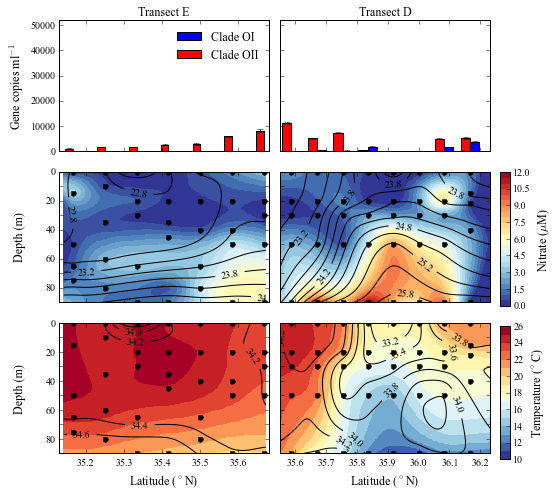

In [11]:
## make a figure S3

den_lev = [22.5, 22.75, 23., 23.25, 23.5, 23.75, 24., 24.25, 24.5, 24.75, 25., 25.25, 25.5, 25.75, 26.]
sal_lev = [33.2, 33.4, 33.6, 33.8, 34., 34.2, 34.4, 34.6]


width = 0.02
figS3 , ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3,2, sharex = 'col', figsize=(7,7), dpi = 600)
ax3.invert_yaxis()
ax4.invert_yaxis()
ax5.invert_yaxis()
ax6.invert_yaxis()

# column 1, transect A
ax1.bar(lat[E],OI[E], width, yerr = OIerr[E], color='b',error_kw=dict(ecolor='k'), label = 'Clade OI')
ax1.bar(lat[E]-width,OII[E], width, yerr = OIIerr[E], color='r',error_kw=dict(ecolor='k'), label = 'Clade OII')
ax1.set_xlim([35.13, 35.68])
ax1.set_ylim([0, 52000])
ax1.set_ylabel(r'Gene copies ml$^{-1}$', fontsize = 12)
ax1.set_title('Transect E', fontsize=12)

nit = ax3.pcolor(np.reshape(NE[:,0],(190,486)), np.reshape(NE[:,1],(190,486)), np.reshape(NE[:,2],(190,486)), vmin = 0, vmax =12, cmap = palette_nit)
den1 = ax3.contour(np.reshape(DE[:,0],(190,486)), np.reshape(DE[:,1],(190,486)), np.reshape(DE[:,2],(190,486)),den_lev,colors='k')
ax3.clabel(den1, den_lev[1::2], inline=1, fontsize=10, fmt='%3.1f')
ax3.set_ylabel('Depth (m)', fontsize = 12, labelpad = 20)
ax3.set_ylim([90, 0])
ax3.set_yticks([90, 80, 70, 60, 50, 40, 30, 20, 10, 0])
ax3.set_yticklabels(['','80','','60','','40','','20','','0'])
ax3.plot(botlat[Eb], coords[Eb,4].transpose(),'.k',markersize=10)

temp = ax5.pcolor(np.reshape(TE[:,0],(190,486)), np.reshape(TE[:,1],(190,486)), np.reshape(TE[:,2],(190,486)), vmin = 10, vmax =26, cmap = palette_temp)
sal1 = ax5.contour(np.reshape(SE[:,0],(190,486)), np.reshape(SE[:,1],(190,486)), np.reshape(SE[:,2],(190,486)),sal_lev,colors='k')
ax5.clabel(sal1,  inline=1, fontsize=10, fmt='%3.1f')
ax5.set_ylabel('Depth (m)', fontsize = 12, labelpad = 20)
#plt.colorbar(nit, ax = ax3)
ax5.set_xlabel(r'Latitude ($^{\circ}$N)',fontsize=12)
ax5.set_ylim([90, 0])
ax5.set_yticks([90, 80, 70, 60, 50, 40, 30, 20, 10, 0])
ax5.set_yticklabels(['','80','','60','','40','','20','','0'])
ax5.plot(botlat[Eb], coords[Eb,4].transpose(),'.k',markersize=10)

# column 2, transect B
width = 0.03
ax2.bar(lat[D],OI[D], width, yerr = OIerr[D], color='b',error_kw=dict(ecolor='k'))
ax2.bar(lat[D]-width,OII[D], width, yerr = OIIerr[D], color='r',error_kw=dict(ecolor='k'))
ax2.set_xlim([35.55, 36.23])
ax2.set_ylim([0, 52000])
ax2.set_yticklabels(['','','','','',''])
ax2.set_title('Transect D', fontsize=12)

nit = ax4.pcolor(np.reshape(ND[:,0],(190,486)), np.reshape(ND[:,1],(190,486)), np.reshape(ND[:,2],(190,486)), vmin = 0, vmax =12, cmap = palette_nit)
den2 = ax4.contour(np.reshape(DD[:,0],(190,486)), np.reshape(DD[:,1],(190,486)), np.reshape(DD[:,2],(190,486)),den_lev,colors='k')
ax4.clabel(den2, den_lev[1::2], inline=1, fontsize=10, fmt='%3.1f')
ax4.set_yticklabels(['','','','',''])
ax4.set_ylim([90, 0])
ax4.plot(botlat[Db], coords[Db,4].transpose(),'.k',markersize=10)

temp = ax6.pcolor(np.reshape(TD[:,0],(190,486)), np.reshape(TD[:,1],(190,486)), np.reshape(TD[:,2],(190,486)), vmin = 10, vmax =26, cmap = palette_temp)
sal2 = ax6.contour(np.reshape(SD[:,0],(190,486)), np.reshape(SD[:,1],(190,486)), np.reshape(SD[:,2],(190,486)),sal_lev,colors='k')
ax6.clabel(sal2, inline=1, fontsize=10, fmt='%3.1f')
#plt.colorbar(nit, ax = ax3)
ax6.set_xlabel(r'Latitude ($^{\circ}$N)',fontsize=12)
ax6.set_yticklabels(['','','','',''])
ax6.set_ylim([90, 0])
ax6.plot(botlat[Db], coords[Db,4].transpose(),'.k',markersize=10)

figS3.subplots_adjust(right=0.8)
cbar_ax3 = figS3.add_axes([1., 0.385, 0.02, 0.265])
cb3 = figS3.colorbar(nit, cax=cbar_ax3)
cb3.set_label(label=r'Nitrate ($\mu$M)',fontsize=12)

cbar_ax4 = figS3.add_axes([1., 0.08, 0.02, 0.265])
cb4 = figS3.colorbar(temp, cax=cbar_ax4)
cb4.set_label(label=r'Temperature ($^{\circ}$C)',fontsize=12)

ax1.legend(loc='upper right', frameon=False)
ax1.get_legend()

figS3.subplots_adjust(hspace=0)


figS3.savefig('/Users/sclayton/Desktop/LO_figS3.tiff', format='tiff', dpi=600, bbox_inches='tight')